In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kuliah/uas/mobileprice_modified.csv')
pd.options.display.max_columns = None

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1,0,7.0,0.6,188.0,2,2,20,756,NaN,9,7,19,0,0,1,1
1,1021.0,1,0.5,1,0,1,53.0,0.7,136.0,3,6,905,1988,2631.0,17,3,7,1,1,0,2
2,563.0,1,0.5,1,2,1,41.0,0.9,145.0,5,6,1263,1716,2603.0,11,2,9,1,1,0,2
3,615.0,1,2.5,0,0,0,10.0,0.8,131.0,6,9,1216,1786,2769.0,16,8,11,1,0,0,2
4,1821.0,1,1.2,0,13,1,44.0,0.6,141.0,2,14,1208,1212,1411.0,8,2,15,1,1,0,1


Mengindentifikasi nama dan jenis atribut dari seluruh atribut prediktor dan atribut label yang terdapat pada dataset tersebut. sebelum menentukan jenis atribut, anda dapat memastikan terlebih dahulu berapa banyak nilai unik yang terdapat di dalam setiap atribut. untuk atribut yang berjenis kategorik, sebutkan nilai unik yang terdapat pada atribut tersebut.

In [ ]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]})
null_count()

,features,dtypes,NaN count,NaN percentage
0,battery_power,float64,10,0.005
1,blue,int64,0,0.000
2,clock_speed,float64,0,0.000
3,dual_sim,int64,0,0.000
4,fc,int64,0,0.000
5,four_g,int64,0,0.000
6,int_memory,float64,10,0.005
7,m_dep,float64,0,0.000
8,mobile_wt,float64,10,0.005
9,n_cores,int64,0,0.000


In [ ]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Nilai unik untuk kolom '{col}': {unique_values}")

Nilai unik untuk kolom 'battery_power': [ 842. 1021.  563. ... 1139. 1467.  858.]
Nilai unik untuk kolom 'blue': [0 1]
Nilai unik untuk kolom 'clock_speed': [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Nilai unik untuk kolom 'dual_sim': [0 1]
Nilai unik untuk kolom 'fc': [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Nilai unik untuk kolom 'four_g': [0 1]
Nilai unik untuk kolom 'int_memory': [ 7. 53. 41. 10. 44. 22. 24.  9. 33. 17. 52. 46. 13. 23. 49. 19. 39. 47.
 38.  8. 57. 51. 21.  5. 60. 61.  6. 11. 50. 34. 20. 27. 42. 40. 64. 14.
 63. 43. 16. 48. 12. 55. 36. 30. 45. 29. 58. 25.  3. 54. 15. 37. 31. 32.
  4. 18.  2. 56. 26. 35. 59. 28. 62. nan]
Nilai unik untuk kolom 'm_dep': [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Nilai unik untuk kolom 'mobile_wt': [188. 136. 145. 131. 141. 164. 139. 187. 174.  93. 182. 177. 159. 198.
 185. 196. 121. 101.  81. 156. 199.  nan 111. 114. 132. 143.  96. 200.
  88. 150. 107.

Melakukan praproses data

Pisahkan bagian atribut prediktor dengan label data menjadi dua variabel terpisah

In [ ]:
x = df.drop(columns=['price_range'])
y = df['price_range']

Gunakan SimpleImputer untuk menangani missing values, dengan nilai rata-rata dari atribut data sebagai strategi pengisian

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
x[['battery_power', 'int_memory', 'mobile_wt', 'ram']] = imputer.fit_transform(x[['battery_power', 'int_memory', 'mobile_wt', 'ram']])

terapkan StandardScaler untuk mengubah nilai atribut prediktor, agar nilai dari masing masing atribut menjadi seragam

In [ ]:
scaler = StandardScaler()
numerical_features = x.select_dtypes(include=['float64', 'int64']).columns
x[numerical_features] = scaler.fit_transform(x[numerical_features])

Tampilkan statistik deskriptif dari atribut data sebelum dan setelah dilakukan pengisian missing values dan standarisasi

In [ ]:
print(f"Summary Of The Dataset with numerical columns :")
x.describe()

Summary Of The Dataset with numerical columns :


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-1.563194e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,5.684342e-17,-1.030287e-16,-3.765876e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.492140e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.680562e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.658030e+00,-1.393304e+00,-1.709003e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.727512e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00
25%,-8.806122e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.839717e-01,-1.046495e+00,-8.876966e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.450354e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00
50%,-1.680370e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,0.000000e+00,-6.069151e-03,1.857225e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,5.091091e-03,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01
75%,8.578380e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.853054e-01,1.034357e+00,8.398784e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.642295e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01
max,1.733620e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.769944e+00,1.727974e+00,1.689505e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.731225e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01


Membangun model klasifikasi berdasarkan dataset yang telah dilakukan praproses data

gunakan salah satu algoritma berikut untuk membangun model klasifikasi: Desicion Tree atau SVM

gunakan metode holdout untuk membagi keseluruhan dataset menjadi data training dan data testing, dengan proporsi 85% data training dan 15% data testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Tampilkan confusion matrix dan akurasi dari model tersebut

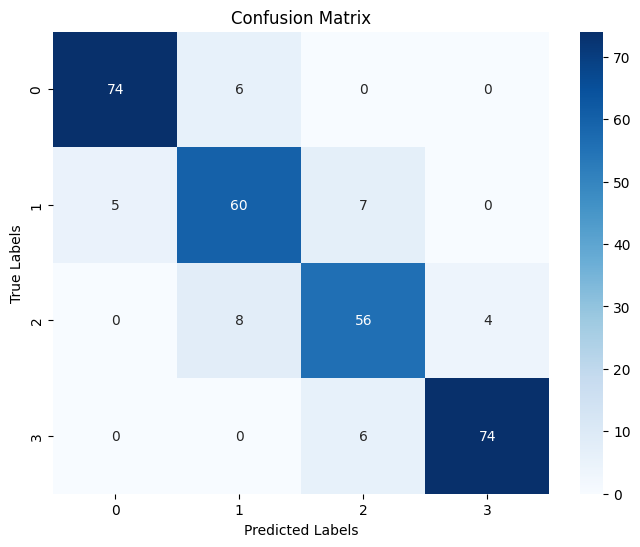

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.88
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        80
           1       0.81      0.83      0.82        72
           2       0.81      0.82      0.82        68
           3       0.95      0.93      0.94        80

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

